<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-in-tensorflow/blob/main/DanielBourkeInspiredTensorflowExercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.style.use("ggplot")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.select_dtypes(include='object').columns, df.select_dtypes(exclude='object').columns

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children', 'charges'], dtype='object'))

In [ ]:
np.round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


In [ ]:
np.round(df[['age', 'bmi', 'children', 'charges']].agg(['min', 'max']), 2)

,age,bmi,children,charges
min,18,15.96,0,1121.87
max,64,53.13,5,63770.43


<Figure size 720x1296 with 0 Axes>

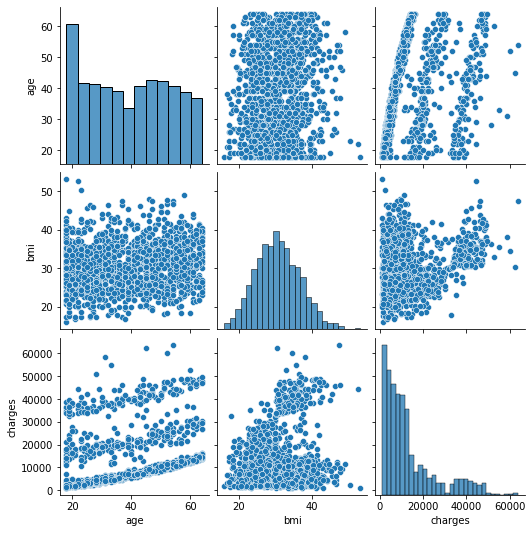

In [ ]:
plt.figure(figsize=(10,18))
sns.pairplot(df[['age', 'bmi', 'charges']])
plt.show()

<Axes: >

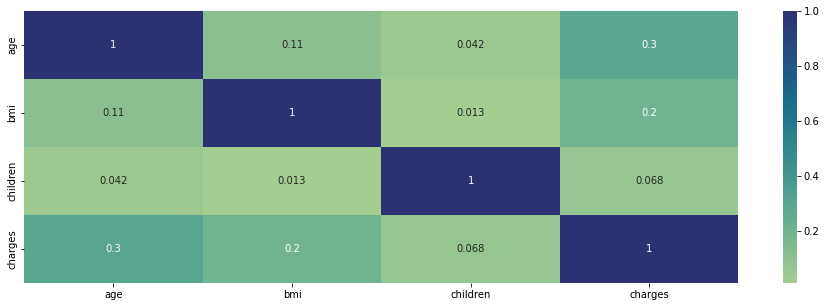

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(), cmap='crest', annot=True)

In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


___ Appllying machine learning using Tensorflow

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
#prepare the data
# df.drop('charges', axis=1)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
num_features = list(X.select_dtypes(include='number').columns)
cat_features = list(X.select_dtypes(exclude='number').columns)

#prepare the transformers
num_transformer = Pipeline(
    steps=[
          ('imputer', SimpleImputer(strategy='median')),
          ('scaler', MinMaxScaler())
          ]
)

cat_transformer= Pipeline(
      steps=[
          ('ohe', OneHotEncoder())
          ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [ ]:
def tfmodel_1():
  #Buile the NN model
  model.add(tf.keras.layers.Dense(10, input_dim=6))
  model.add(tf.keras.layers.Dense(10, tf.keras.activations.relu))
  model.add(tf.keras.layers.Dense(1, tf.keras.activations.relu))

  # compile the model(error and optimizations)
  model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=tf.keras.metrics.mae
  )

In [ ]:
X_trans = preprocessor.fit_transform(X)
X_trans.shape

(1338, 11)

In [ ]:
#split the features
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [ ]:
#instantiate a NN tf model
model = tf.keras.Sequential()
#Buile the NN model
model.add(tf.keras.layers.Dense(3, input_dim=11))
model.add(tf.keras.layers.Dense(5, tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1, tf.keras.activations.relu))

  # compile the model(error and optimizations)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=tf.keras.metrics.mae )
#fit the model
model.fit(X_train, y_train, epochs=10, verbose=False)

#evaluate the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3205.3672 - mean_absolute_error: 3205.3672


[3205.3671875, 3205.3671875]

In [ ]:
from tensorflow.keras.utils import plot_model

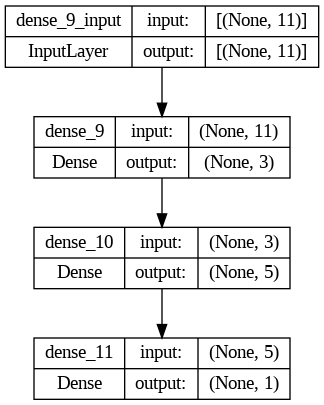

In [ ]:
plot_model(model,  show_shapes=True)

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

In [ ]:
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = np.where(df['target']==0, 'setosa',
                         np.where(df['target']==1,'versicolor',
                                  'virginica'))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
for i in range(0,3):
  print(df[df['target']==i]['species'].value_counts())

setosa    50
Name: species, dtype: int64
versicolor    50
Name: species, dtype: int64
virginica    50
Name: species, dtype: int64


In [ ]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

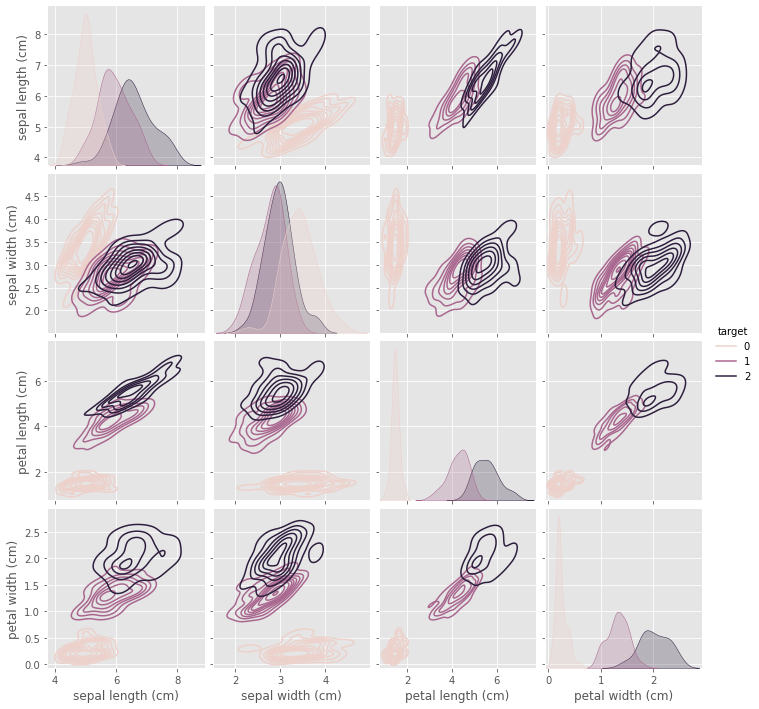

In [ ]:
sns.pairplot(df, hue='target', kind='kde')
plt.show()

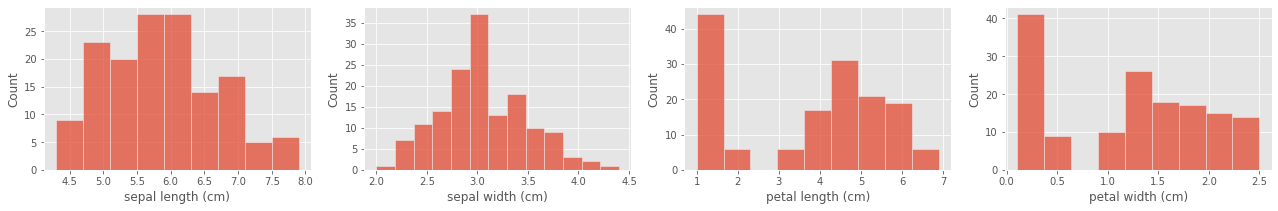

In [ ]:
plt.figure(figsize=(22,3))
def plotter(col):
    return sns.histplot(df[col])

for i in range(1,5):
  plt.subplot(1,4,i)
  plotter(df.columns[i-1])

In [ ]:
df.describe()

NameError: ignored

In [ ]:
for i in range(1,5):
  print(i)

1
2
3
4


In [ ]:
# X - Xmin /(Xmax-Xmin)